## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "exams.csv" containing year-end exam grades for a thousand students.

By using the `head()` command, we display the first five rows of data:

In [1]:
# Importing the pandas module
import pandas as pd

# Reading in the data
df = pd.read_csv('exams.csv')

# Take a look at the first datapoints
df.head()


,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data analysis example:

Find the average reading score for each race/ethnicity group. 

We can use `groupby` to group the information by the column "race/ethnicity". Then we select the column "reading" and use `.mean()` to get the average grade for each group:

In [2]:

df.groupby('race/ethnicity')[['reading']].mean()

,reading
race/ethnicity,
group A,64.674157
group B,67.352632
group C,69.103448
group D,70.030534
group E,73.028571


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's look at the average writing score by lunch group and gender. 

We are using the `seaborn` library for this example. We will use the `catplot()` function on the data we want to display.

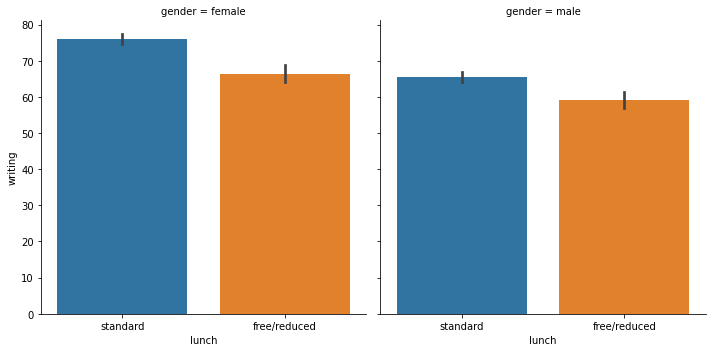

In [3]:
import seaborn as sns

sns.catplot(x='lunch', y='writing', col='gender', data=df, kind='bar');

# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the      test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the        others. Look at the correlations between scores.
6. Summarize your findings.

## ⌛️ Time is ticking. Good luck!

In [4]:
df.head()



,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


What are the average reading scores for students with/without the test preparation course?

In [5]:
avg_reading_scores = df.groupby('test_prep_course')[['reading']].mean()
avg_reading_scores

,reading
test_prep_course,
completed,73.893855
none,66.534268


What are the average scores for the different parental education levels?


In [6]:
Par_educ_level = df.groupby('parent_education_level')['reading','writing','math'].mean()
Par_educ_level


C:\Users\HP\AppData\Local\Temp/ipykernel_17720/2297000293.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Par_educ_level = df.groupby('parent_education_level')['reading','writing','math'].mean()


,reading,writing,math
parent_education_level,,,
associate's degree,70.927928,69.896396,67.882883
bachelor's degree,73.000000,73.381356,69.389831
high school,64.704082,62.448980,62.137755
master's degree,75.372881,75.677966,69.745763
some college,69.460177,68.840708,67.128319
some high school,66.938547,64.888268,63.497207


Create plots to visualize findings for questions 1 and 2.


In [7]:
import matplotlib.pyplot as plt

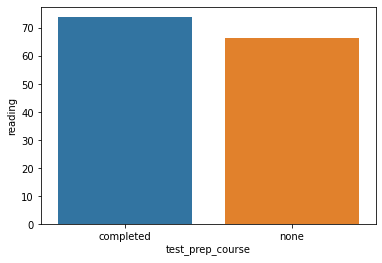

In [9]:
## Question 1 =k
R = sns.barplot(x =avg_reading_scores.index, y = avg_reading_scores.reading, data =avg_reading_scores, label = 'reading' )
R
plt.show()

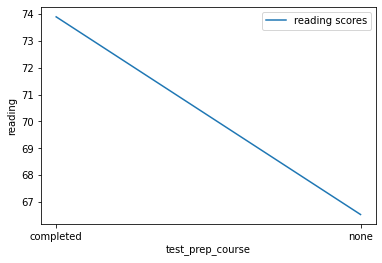

In [10]:
sns.lineplot(x =avg_reading_scores.index, y = avg_reading_scores.reading, data =avg_reading_scores, label = 'reading scores' )

plt.show()

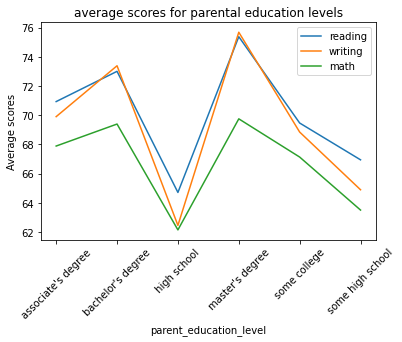

In [11]:
Par_educ_level.plot()
plt.xticks(rotation = 45)
plt.ylabel('Average scores')
plt.title('average scores for parental education levels')
plt.show()

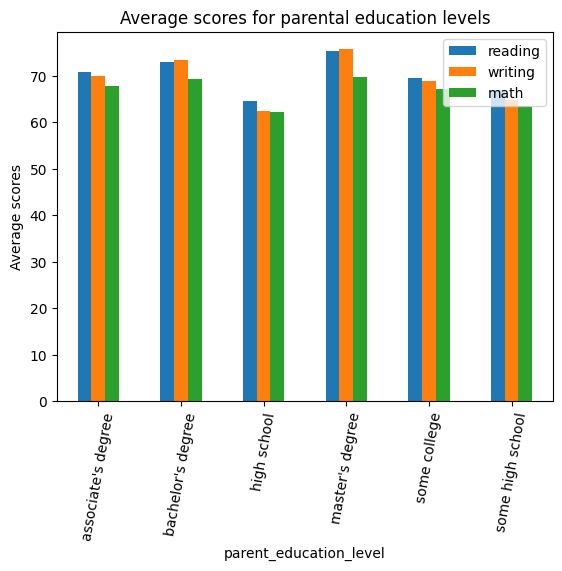

In [11]:
Par_educ_level.plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.ylabel('Average scores')
plt.title('Average scores for parental education levels')
plt.show()

[Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

In [12]:
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


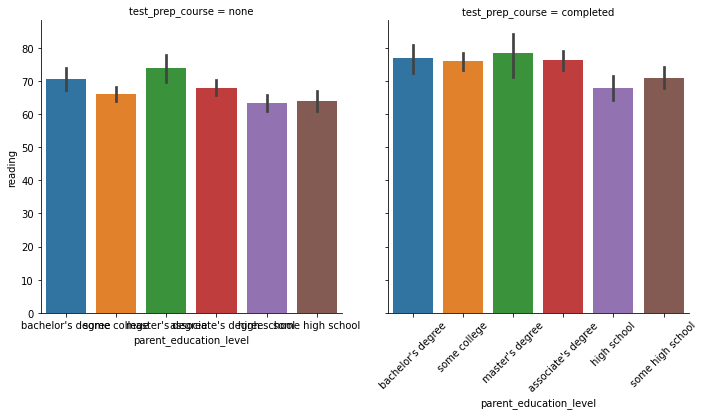

In [13]:
sns.catplot(x='parent_education_level', y='reading', col='test_prep_course', data=df, kind='bar');
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.ylabel('Reading scores')
plt.show()



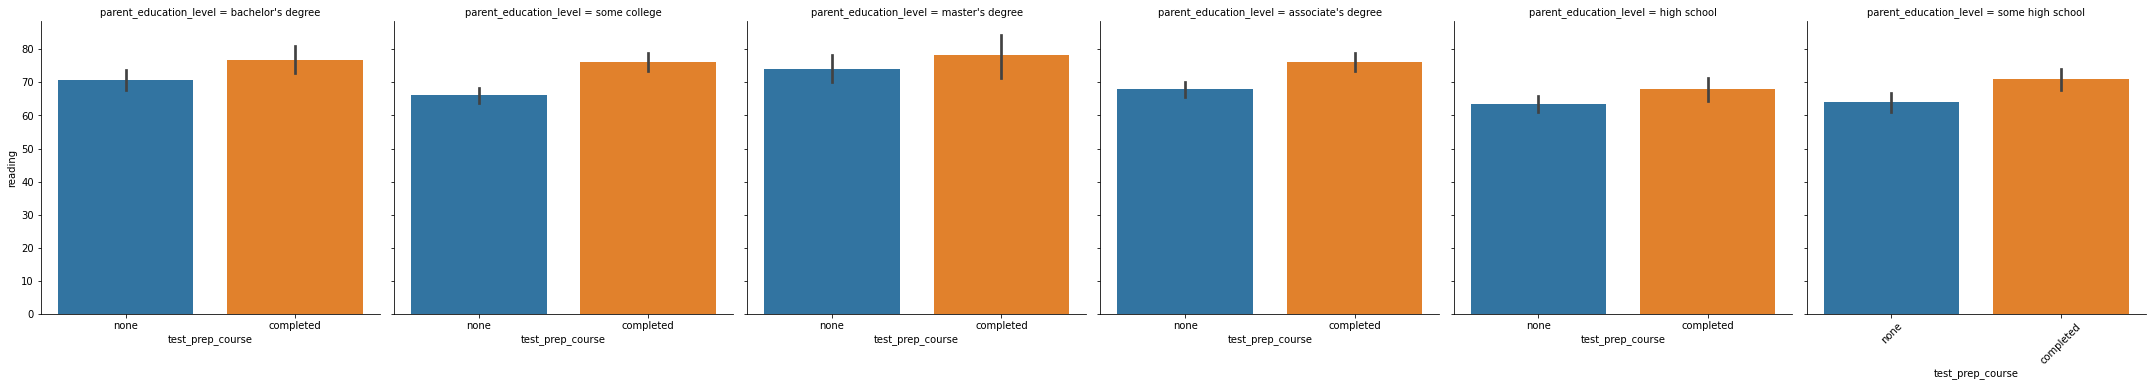

In [14]:
sns.catplot(x='test_prep_course', y='reading', col='parent_education_level', data=df, kind='bar');
plt.xticks(rotation = 45)
plt.ylabel('Reading scores')
plt.show()

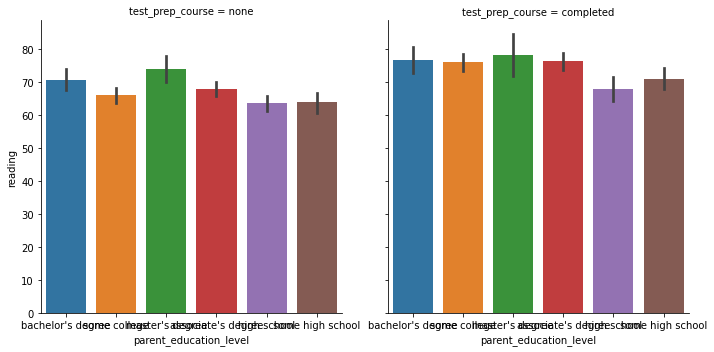

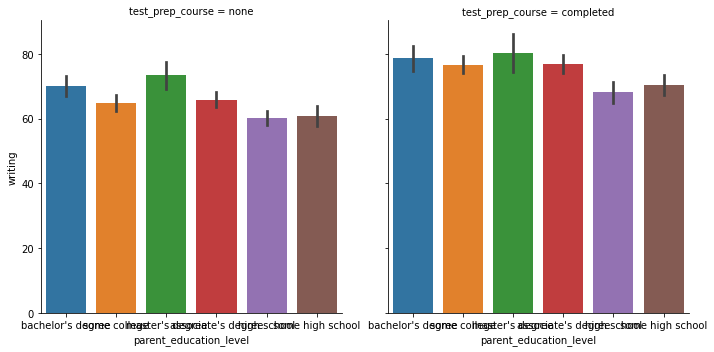

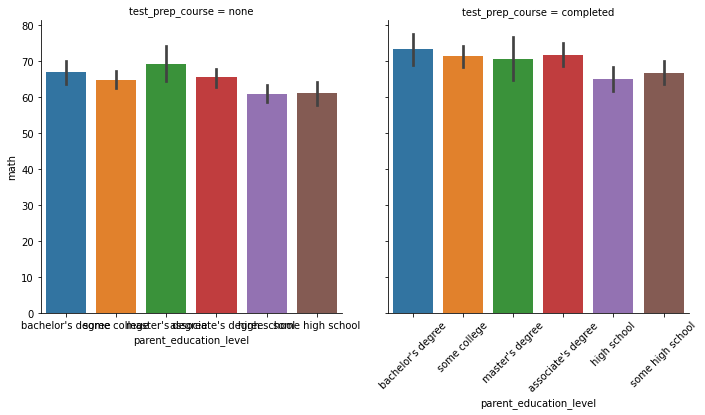

In [15]:
sns.catplot(x='parent_education_level', y='reading', col='test_prep_course', data=df, kind='bar');
plt.ylabel('Reading scores')
sns.catplot(x='parent_education_level', y='writing', col='test_prep_course', data=df, kind='bar')
plt.ylabel('Writing scores')
sns.catplot(x='parent_education_level', y='math', col='test_prep_course', data=df, kind='bar')
plt.xticks(rotation = 45)


plt.show()


[Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

In [16]:
correlation = df.corr()
correlation

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


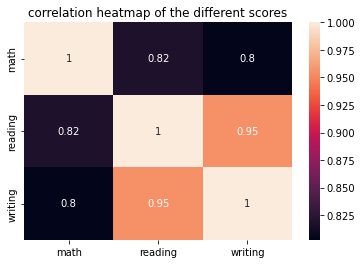

In [17]:
sns.heatmap(correlation,annot = True)
plt.title('correlation heatmap of the different scores')
plt.show()

The scores of the students were more dependent on taking the test prep courses than their parent's educational level.

Students had better scores in reading followed by writing and then, maths.

The correlation plot shows a high correlation amongst the different scores(reading, writing, maths) with the correlation between reading and writing showing a strong association.

The parental level of education has an effect on the students' performance. Plot 2 shows that stdents whose parents had high school has their level of education performed lower than other students.



In [18]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000
